# Convex, concave and linear feasible space #

In [1]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In this notebook we calculate growth rate at different compositions for a small toy model. The toy model is shown below and contains two members. Member A (blue) is producing an inhibitory compound upon growth ($Y^{2}$). This compound needs to be removed by Member B (red), by using some of it's growth substrate ($S^{2}$). By changing the stoichiometry of reactions $\bar{v}^{2}_{4}$ and $\bar{v}^{2}_{5}$ regarding the ratio of $P^{2}$ and $B^{2}$ produced from $S^{2}$, the shape of the feasible area projected onto growth rate and mass fraction becomes convex, linear, or concave

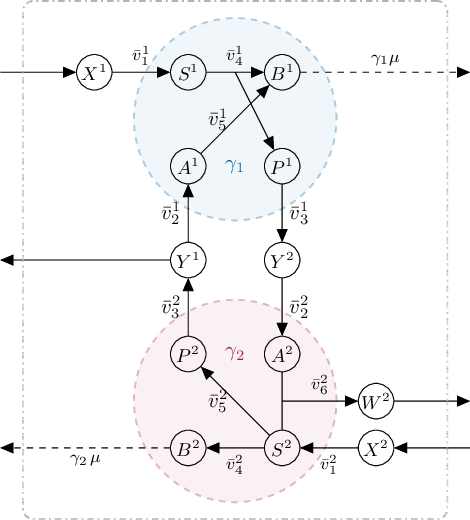

In [2]:
display.Image("figures/example04.png")

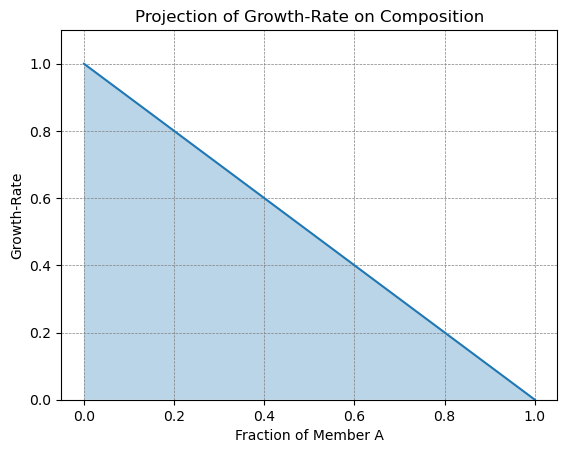

In [3]:
mu = {}
mu_min = {}
for f in [0.01*i for i in range(101)]:
    model = cobra.Model()
    model.add_metabolites([cobra.Metabolite(i) for i in ["S1", "X1_ex", "S2", "X2_ex", "Y1_ex", "Y2_ex", "A1", "P1", "A2", "P2", "BM_A", "BM_B"]])
    model.add_reactions([cobra.Reaction(i) for i in ["EX_X1_ex", "EX_X2_ex", "EX_Y1_ex", "EX_Y2_ex", "TP_X1", "TP_X2", "TP_Y1_A", "TP_Y1_B", "TP_Y2_A", "TP_Y2_B", "v4A", "v5A", "v4B", "v5B", "BM_com"]])
    
    model.reactions.EX_X1_ex.add_metabolites({"X1_ex": -1})
    model.reactions.TP_X1.add_metabolites({"X1_ex": -1, "S1": 1})
    model.reactions.EX_X2_ex.add_metabolites({"X2_ex": -1})
    model.reactions.TP_X2.add_metabolites({"X2_ex": -1, "S2": 1})
    
    model.reactions.EX_Y1_ex.add_metabolites({"Y1_ex": -1})
    model.reactions.TP_Y2_A.add_metabolites({"Y2_ex": -1, "P1": 1})
    model.reactions.TP_Y2_B.add_metabolites({"Y2_ex": -1, "A2": 1})
    model.reactions.EX_Y2_ex.add_metabolites({"Y2_ex": -1})
    model.reactions.TP_Y1_B.add_metabolites({"Y1_ex": -1, "P2": 1})
    model.reactions.TP_Y1_A.add_metabolites({"Y1_ex": -1, "A1": 1})
    
    model.reactions.v4A.add_metabolites({"S1": -1, "BM_A": 1, "P1": 1})
    model.reactions.v5A.add_metabolites({"A1": -1, "BM_A": 1})
    model.reactions.v4B.add_metabolites({"S2": -1, "BM_B": 1})
    model.reactions.v5B.add_metabolites({"A2": -1, "S2": -1})
    model.reactions.BM_com.add_metabolites({"BM_A": -f, "BM_B": -(1-f)})
    
    model.reactions.EX_X1_ex.bounds = (-1000.,0.)
    model.reactions.EX_X2_ex.bounds = (-1000.,0.)
    model.reactions.EX_Y1_ex.bounds = (0.,1000.)
    model.reactions.EX_Y2_ex.bounds = (0.,0.)
    
    model.reactions.TP_X1.bounds = (0.,f*1)
    model.reactions.TP_Y2_A.bounds = (-1000*f,0.)
    model.reactions.TP_Y1_A.bounds = (0.,f*1000)

    model.reactions.TP_X2.bounds = (0.,(1-f)*1)
    model.reactions.TP_Y1_B.bounds = (-1000*(1-f),0.)
    model.reactions.TP_Y2_B.bounds = (0.,(1-f)*1000)
    
    model.reactions.v4A.bounds = (-0.*f,1000*f)
    model.reactions.v5A.bounds = (-0.*f,1000.*f)
    model.reactions.v4B.bounds = (-0.*(1-f),1000*(1-f))
    model.reactions.v5B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.reactions.BM_com.bounds = (0,1000)

    model.add_metabolites([cobra.Metabolite(i) for i in ["W2_ex"]])
    model.add_reactions([cobra.Reaction(i) for i in ["v6B", "EX_W2_ex"]])
    model.reactions.v5B.add_metabolites({"W2_ex": 1})
    model.reactions.EX_W2_ex.add_metabolites({"W2_ex": -1})
    model.reactions.EX_W2_ex.bounds = (0.,1000.)
    model.reactions.v6B.add_metabolites({"S2": -1, "P2": 1})
    model.reactions.v6B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.objective = 'BM_com'
    sol = model.optimize("maximize")
    mu[f] = sol.objective_value

    sol = model.optimize("minimize")
    mu_min[f] = sol.objective_value
plt.plot(mu.keys(), mu.values())
plt.ylim(0.,1.1)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.fill_between(mu.keys(), mu.values(), mu_min.values(), alpha=0.3)
plt.title("Projection of Growth-Rate on Composition")
plt.ylabel("Growth-Rate")
plt.xlabel("Fraction of Member A")
plt.savefig("figures/growth_rate_toy_detox_linear.svg")
   

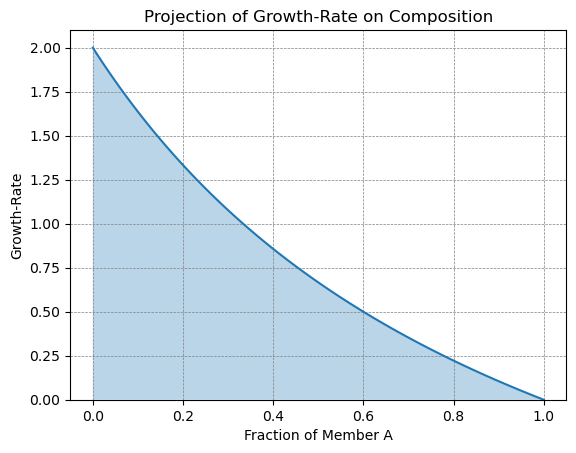

In [4]:
mu = {}
for f in [0.01*i for i in range(101)]:
    model = cobra.Model()
    model.add_metabolites([cobra.Metabolite(i) for i in ["S1", "X1_ex", "S2", "X2_ex", "Y1_ex", "Y2_ex", "A1", "P1", "A2", "P2", "BM_A", "BM_B"]])
    model.add_reactions([cobra.Reaction(i) for i in ["EX_X1_ex", "EX_X2_ex", "EX_Y1_ex", "EX_Y2_ex", "TP_X1", "TP_X2", "TP_Y1_A", "TP_Y1_B", "TP_Y2_A", "TP_Y2_B", "v4A", "v5A", "v4B", "v5B", "BM_com"]])
    
    model.reactions.EX_X1_ex.add_metabolites({"X1_ex": -1})
    model.reactions.TP_X1.add_metabolites({"X1_ex": -1, "S1": 1})
    model.reactions.EX_X2_ex.add_metabolites({"X2_ex": -1})
    model.reactions.TP_X2.add_metabolites({"X2_ex": -1, "S2": 1})
    
    model.reactions.EX_Y1_ex.add_metabolites({"Y1_ex": -1})
    model.reactions.TP_Y2_A.add_metabolites({"Y2_ex": -1, "P1": 1})
    model.reactions.TP_Y2_B.add_metabolites({"Y2_ex": -1, "A2": 1})
    model.reactions.EX_Y2_ex.add_metabolites({"Y2_ex": -1})
    model.reactions.TP_Y1_B.add_metabolites({"Y1_ex": -1, "P2": 1})
    model.reactions.TP_Y1_A.add_metabolites({"Y1_ex": -1, "A1": 1})
    
    model.reactions.v4A.add_metabolites({"S1": -1, "BM_A": 1, "P1": 1})
    model.reactions.v5A.add_metabolites({"A1": -1, "BM_A": 1})
    model.reactions.v4B.add_metabolites({"S2": -1, "BM_B": 2})
    model.reactions.v5B.add_metabolites({"A2": -1, "S2": -1})
    model.reactions.BM_com.add_metabolites({"BM_A": -f, "BM_B": -(1-f)})
    
    model.reactions.EX_X1_ex.bounds = (-1000.,0.)
    model.reactions.EX_X2_ex.bounds = (-1000.,0.)
    model.reactions.EX_Y1_ex.bounds = (0.,1000.)
    model.reactions.EX_Y2_ex.bounds = (0.,0.)
    
    model.reactions.TP_X1.bounds = (0.,f*1)
    model.reactions.TP_Y2_A.bounds = (-1000*f,0.)
    model.reactions.TP_Y1_A.bounds = (0.,f*1000)

    model.reactions.TP_X2.bounds = (0.,(1-f)*1)
    model.reactions.TP_Y1_B.bounds = (-1000*(1-f),0.)
    model.reactions.TP_Y2_B.bounds = (0.,(1-f)*1000)
    
    model.reactions.v4A.bounds = (-0.*f,1000*f)
    model.reactions.v5A.bounds = (-0.*f,1000.*f)
    model.reactions.v4B.bounds = (-0.*(1-f),1000*(1-f))
    model.reactions.v5B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.reactions.BM_com.bounds = (0,1000)

    model.add_metabolites([cobra.Metabolite(i) for i in ["W2_ex"]])
    model.add_reactions([cobra.Reaction(i) for i in ["v6B", "EX_W2_ex"]])
    model.reactions.v5B.add_metabolites({"W2_ex": 1})
    model.reactions.EX_W2_ex.add_metabolites({"W2_ex": -1})
    model.reactions.EX_W2_ex.bounds = (0.,1000.)
    model.reactions.v6B.add_metabolites({"S2": -1, "P2": 1})
    model.reactions.v6B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.objective = 'BM_com'
    sol = model.optimize("maximize")
    mu[f] = sol.objective_value

    sol = model.optimize("minimize")
    mu_min[f] = sol.objective_value
    
plt.plot(mu.keys(), mu.values())
plt.ylim(0.,2.1)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.fill_between(mu.keys(), mu.values(), mu_min.values(), alpha=0.3)
plt.title("Projection of Growth-Rate on Composition")
plt.ylabel("Growth-Rate")
plt.xlabel("Fraction of Member A")
plt.savefig("figures/growth_rate_toy_detox_concave.svg")
   

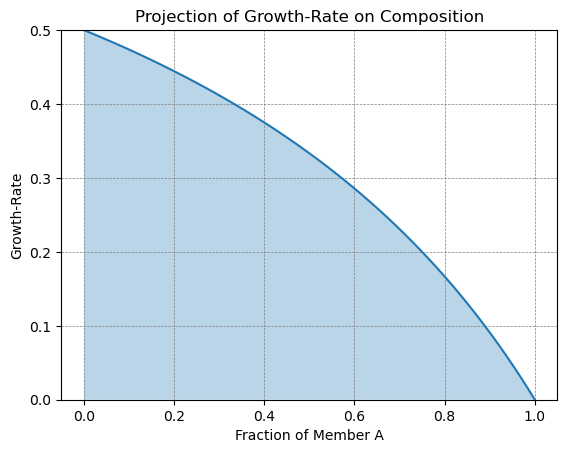

In [5]:
mu = {}
for f in [0.01*i for i in range(101)]:
    model = cobra.Model()
    model.add_metabolites([cobra.Metabolite(i) for i in ["S1", "X1_ex", "S2", "X2_ex", "Y1_ex", "Y2_ex", "A1", "P1", "A2", "P2", "BM_A", "BM_B"]])
    model.add_reactions([cobra.Reaction(i) for i in ["EX_X1_ex", "EX_X2_ex", "EX_Y1_ex", "EX_Y2_ex", "TP_X1", "TP_X2", "TP_Y1_A", "TP_Y1_B", "TP_Y2_A", "TP_Y2_B", "v4A", "v5A", "v4B", "v5B", "BM_com"]])
    
    model.reactions.EX_X1_ex.add_metabolites({"X1_ex": -1})
    model.reactions.TP_X1.add_metabolites({"X1_ex": -1, "S1": 1})
    model.reactions.EX_X2_ex.add_metabolites({"X2_ex": -1})
    model.reactions.TP_X2.add_metabolites({"X2_ex": -1, "S2": 1})
    
    model.reactions.EX_Y1_ex.add_metabolites({"Y1_ex": -1})
    model.reactions.TP_Y2_A.add_metabolites({"Y2_ex": -1, "P1": 1})
    model.reactions.TP_Y2_B.add_metabolites({"Y2_ex": -1, "A2": 1})
    model.reactions.EX_Y2_ex.add_metabolites({"Y2_ex": -1})
    model.reactions.TP_Y1_B.add_metabolites({"Y1_ex": -1, "P2": 1})
    model.reactions.TP_Y1_A.add_metabolites({"Y1_ex": -1, "A1": 1})
    
    model.reactions.v4A.add_metabolites({"S1": -1, "BM_A": 1, "P1": 1})
    model.reactions.v5A.add_metabolites({"A1": -1, "BM_A": 1})
    model.reactions.v4B.add_metabolites({"S2": -1, "BM_B": 0.5})
    model.reactions.v5B.add_metabolites({"A2": -1, "S2": -1})
    model.reactions.BM_com.add_metabolites({"BM_A": -f, "BM_B": -(1-f)})
    
    model.reactions.EX_X1_ex.bounds = (-1000.,0.)
    model.reactions.EX_X2_ex.bounds = (-1000.,0.)
    model.reactions.EX_Y1_ex.bounds = (0.,1000.)
    model.reactions.EX_Y2_ex.bounds = (0.,0.)
    
    model.reactions.TP_X1.bounds = (0.,f*1)
    model.reactions.TP_Y2_A.bounds = (-1000*f,0.)
    model.reactions.TP_Y1_A.bounds = (0.,f*1000)

    model.reactions.TP_X2.bounds = (0.,(1-f)*1)
    model.reactions.TP_Y1_B.bounds = (-1000*(1-f),0.)
    model.reactions.TP_Y2_B.bounds = (0.,(1-f)*1000)
    
    model.reactions.v4A.bounds = (-0.*f,1000*f)
    model.reactions.v5A.bounds = (-0.*f,1000.*f)
    model.reactions.v4B.bounds = (-0.*(1-f),1000*(1-f))
    model.reactions.v5B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.reactions.BM_com.bounds = (0,1000)

    model.add_metabolites([cobra.Metabolite(i) for i in ["W2_ex"]])
    model.add_reactions([cobra.Reaction(i) for i in ["v6B", "EX_W2_ex"]])
    model.reactions.v5B.add_metabolites({"W2_ex": 1})
    model.reactions.EX_W2_ex.add_metabolites({"W2_ex": -1})
    model.reactions.EX_W2_ex.bounds = (0.,1000.)
    model.reactions.v6B.add_metabolites({"S2": -1, "P2": 1})
    model.reactions.v6B.bounds = (-0.*(1-f),1000*(1-f))
    
    model.objective = 'BM_com'
    sol = model.optimize("maximize")
    mu[f] = sol.objective_value

    sol = model.optimize("minimize")
    mu_min[f] = sol.objective_value
    
plt.plot(mu.keys(), mu.values())
plt.ylim(0.,0.5)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.fill_between(mu.keys(), mu.values(), mu_min.values(), alpha=0.3)
plt.title("Projection of Growth-Rate on Composition")
plt.ylabel("Growth-Rate")
plt.xlabel("Fraction of Member A")
plt.savefig("figures/growth_rate_toy_convex.svg")
   